In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
%run -i classes.ipynb

In [3]:
# Manual hyperparameters
epochs = 100
patience = 7
num_trials = 20 # For hyperparameter tuning

In [4]:
# Import and split the data
data = pd.read_csv('./data/train.csv')
X = data.drop('loan_status', axis=1)
y = data['loan_status']


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=420
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=69
)

preprocessor = LoanPreprocessor()
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

train_dataset = LoanDataset(X_train_processed, y_train.values)
val_dataset = LoanDataset(X_val_processed, y_val.values)
test_dataset = LoanDataset(X_test_processed, y_test.values)

input_size = X_train_processed.shape[1]

In [5]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=num_trials)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best accuracy: ", study.best_value)

# Create a DataFrame to store the results
results = []
for trial in study.trials:
    results.append({
        'Trial': trial.number,
        'Hidden Size 1': trial.params['hidden_size1'],
        'Hidden Size 2': trial.params['hidden_size2'],
        'Dropout Rate': trial.params['dropout_rate'],
        'Learning Rate': trial.params['learning_rate'],
        'Batch Size': trial.params['batch_size'],
        'Accuracy': trial.value
    })

results_df = pd.DataFrame(results)

# Display the results
print("\nHyperparameter Tuning Results:")
print(results_df)

# Save the hyperparameter tuning results to a CSV file
results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

# Define file paths to save the best parameters and model
params_file_path = f"models/best_params.json"
model_save_path = f"models/best_model.pth"

# Load the best model weights
best_model_weights = torch.load(f"models/best_model_trial_{study.best_trial.number}.pth")

# Save the best parameters to a JSON file
with open(params_file_path, 'w') as json_file:
    json.dump(study.best_params, json_file)

# Save the best model weights to a file
torch.save(best_model_weights, model_save_path)

[I 2024-12-21 04:59:58,827] A new study created in memory with name: no-name-b27cae39-9a7e-4ba8-89ef-abd98b19deee


Epoch [1/100], Training Loss: 0.6831, Validation Loss: 0.6614
Best model weights saved.
Epoch [2/100], Training Loss: 0.6391, Validation Loss: 0.6169
Best model weights saved.
Epoch [3/100], Training Loss: 0.5946, Validation Loss: 0.5721
Best model weights saved.
Epoch [4/100], Training Loss: 0.5495, Validation Loss: 0.5267
Best model weights saved.
Epoch [5/100], Training Loss: 0.5048, Validation Loss: 0.4828
Best model weights saved.
Epoch [6/100], Training Loss: 0.4634, Validation Loss: 0.4439
Best model weights saved.
Epoch [7/100], Training Loss: 0.4283, Validation Loss: 0.4120
Best model weights saved.
Epoch [8/100], Training Loss: 0.4001, Validation Loss: 0.3866
Best model weights saved.
Epoch [9/100], Training Loss: 0.3776, Validation Loss: 0.3663
Best model weights saved.
Epoch [10/100], Training Loss: 0.3596, Validation Loss: 0.3496
Best model weights saved.
Epoch [11/100], Training Loss: 0.3446, Validation Loss: 0.3355
Best model weights saved.
Epoch [12/100], Training Loss:

[I 2024-12-21 05:00:52,563] Trial 0 finished with value: 0.9324769807889053 and parameters: {'hidden_size1': 130, 'hidden_size2': 153, 'dropout_rate': 0.3456974698382512, 'learning_rate': 1.0803515819378067e-05, 'batch_size': 222}. Best is trial 0 with value: 0.9324769807889053.


Epoch [100/100], Training Loss: 0.1979, Validation Loss: 0.2047
Best model weights saved.
Best model weights saved to models/best_model_trial_0.pth
Epoch [1/100], Training Loss: 0.2502, Validation Loss: 0.2084
Best model weights saved.
Epoch [2/100], Training Loss: 0.1983, Validation Loss: 0.2002
Best model weights saved.
Epoch [3/100], Training Loss: 0.1895, Validation Loss: 0.1974
Best model weights saved.
Epoch [4/100], Training Loss: 0.1853, Validation Loss: 0.1959
Best model weights saved.
Epoch [5/100], Training Loss: 0.1830, Validation Loss: 0.1935
Best model weights saved.
Epoch [6/100], Training Loss: 0.1803, Validation Loss: 0.1920
Best model weights saved.
Epoch [7/100], Training Loss: 0.1783, Validation Loss: 0.1937
Epoch [8/100], Training Loss: 0.1791, Validation Loss: 0.1890
Best model weights saved.
Epoch [9/100], Training Loss: 0.1767, Validation Loss: 0.1870
Best model weights saved.
Epoch [10/100], Training Loss: 0.1758, Validation Loss: 0.1937
Epoch [11/100], Trainin

[I 2024-12-21 05:01:04,946] Trial 1 finished with value: 0.9424803910424008 and parameters: {'hidden_size1': 34, 'hidden_size2': 201, 'dropout_rate': 0.11772388345150527, 'learning_rate': 0.020560841144176122, 'batch_size': 256}. Best is trial 1 with value: 0.9424803910424008.


Epoch [23/100], Training Loss: 0.1700, Validation Loss: 0.1889
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_1.pth
Epoch [1/100], Training Loss: 0.2637, Validation Loss: 0.2108
Best model weights saved.
Epoch [2/100], Training Loss: 0.1992, Validation Loss: 0.1953
Best model weights saved.
Epoch [3/100], Training Loss: 0.1914, Validation Loss: 0.1981
Epoch [4/100], Training Loss: 0.1881, Validation Loss: 0.1915
Best model weights saved.
Epoch [5/100], Training Loss: 0.1851, Validation Loss: 0.1937
Epoch [6/100], Training Loss: 0.1833, Validation Loss: 0.1932
Epoch [7/100], Training Loss: 0.1815, Validation Loss: 0.2065
Epoch [8/100], Training Loss: 0.1818, Validation Loss: 0.1903
Best model weights saved.
Epoch [9/100], Training Loss: 0.1810, Validation Loss: 0.1924
Epoch [10/100], Training Loss: 0.1822, Validation Loss: 0.1939
Epoch [11/100], Training Loss: 0.1900, Validation Loss: 0.2175
Epoch [12/100], Training Loss: 0.1871, Va

[I 2024-12-21 05:01:27,322] Trial 2 finished with value: 0.9395248380129589 and parameters: {'hidden_size1': 71, 'hidden_size2': 239, 'dropout_rate': 0.38768063855877366, 'learning_rate': 0.02206433490909725, 'batch_size': 48}. Best is trial 1 with value: 0.9424803910424008.


Epoch [15/100], Training Loss: 0.1833, Validation Loss: 0.1971
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_2.pth
Epoch [1/100], Training Loss: 0.3019, Validation Loss: 0.2222
Best model weights saved.
Epoch [2/100], Training Loss: 0.2046, Validation Loss: 0.2030
Best model weights saved.
Epoch [3/100], Training Loss: 0.1908, Validation Loss: 0.2005
Best model weights saved.
Epoch [4/100], Training Loss: 0.1865, Validation Loss: 0.1936
Best model weights saved.
Epoch [5/100], Training Loss: 0.1837, Validation Loss: 0.1913
Best model weights saved.
Epoch [6/100], Training Loss: 0.1816, Validation Loss: 0.1901
Best model weights saved.
Epoch [7/100], Training Loss: 0.1801, Validation Loss: 0.1901
Best model weights saved.
Epoch [8/100], Training Loss: 0.1784, Validation Loss: 0.1892
Best model weights saved.
Epoch [9/100], Training Loss: 0.1773, Validation Loss: 0.1916
Epoch [10/100], Training Loss: 0.1764, Validation Loss: 0.1871


[I 2024-12-21 05:01:43,668] Trial 3 finished with value: 0.9446402182562237 and parameters: {'hidden_size1': 50, 'hidden_size2': 48, 'dropout_rate': 0.11866136533720831, 'learning_rate': 0.0013796983303193278, 'batch_size': 187}. Best is trial 3 with value: 0.9446402182562237.


Epoch [28/100], Training Loss: 0.1675, Validation Loss: 0.1873
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_3.pth
Epoch [1/100], Training Loss: 0.3273, Validation Loss: 0.2468
Best model weights saved.
Epoch [2/100], Training Loss: 0.2348, Validation Loss: 0.2256
Best model weights saved.
Epoch [3/100], Training Loss: 0.2177, Validation Loss: 0.2160
Best model weights saved.
Epoch [4/100], Training Loss: 0.2084, Validation Loss: 0.2094
Best model weights saved.
Epoch [5/100], Training Loss: 0.2014, Validation Loss: 0.2042
Best model weights saved.
Epoch [6/100], Training Loss: 0.1963, Validation Loss: 0.2009
Best model weights saved.
Epoch [7/100], Training Loss: 0.1925, Validation Loss: 0.1981
Best model weights saved.
Epoch [8/100], Training Loss: 0.1893, Validation Loss: 0.1962
Best model weights saved.
Epoch [9/100], Training Loss: 0.1871, Validation Loss: 0.1958
Best model weights saved.
Epoch [10/100], Training Loss: 0.1852

[I 2024-12-21 05:03:18,005] Trial 4 finished with value: 0.9416846652267818 and parameters: {'hidden_size1': 223, 'hidden_size2': 248, 'dropout_rate': 0.2906787967558432, 'learning_rate': 4.34038679395373e-05, 'batch_size': 25}. Best is trial 3 with value: 0.9446402182562237.


Epoch [36/100], Training Loss: 0.1704, Validation Loss: 0.1877
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_4.pth
Epoch [1/100], Training Loss: 0.5092, Validation Loss: 0.3597
Best model weights saved.
Epoch [2/100], Training Loss: 0.3122, Validation Loss: 0.2748
Best model weights saved.
Epoch [3/100], Training Loss: 0.2624, Validation Loss: 0.2471
Best model weights saved.
Epoch [4/100], Training Loss: 0.2421, Validation Loss: 0.2358
Best model weights saved.
Epoch [5/100], Training Loss: 0.2325, Validation Loss: 0.2288
Best model weights saved.
Epoch [6/100], Training Loss: 0.2248, Validation Loss: 0.2241
Best model weights saved.
Epoch [7/100], Training Loss: 0.2192, Validation Loss: 0.2199
Best model weights saved.
Epoch [8/100], Training Loss: 0.2145, Validation Loss: 0.2161
Best model weights saved.
Epoch [9/100], Training Loss: 0.2107, Validation Loss: 0.2141
Best model weights saved.
Epoch [10/100], Training Loss: 0.2068

[I 2024-12-21 05:04:30,823] Trial 5 finished with value: 0.9442991929066727 and parameters: {'hidden_size1': 135, 'hidden_size2': 98, 'dropout_rate': 0.31040889700087904, 'learning_rate': 6.718642268852034e-05, 'batch_size': 129}. Best is trial 3 with value: 0.9446402182562237.


Epoch [100/100], Training Loss: 0.1690, Validation Loss: 0.1861
Best model weights saved to models/best_model_trial_5.pth
Epoch [1/100], Training Loss: 0.2563, Validation Loss: 0.2178
Best model weights saved.
Epoch [2/100], Training Loss: 0.1930, Validation Loss: 0.2325
Epoch [3/100], Training Loss: 0.1904, Validation Loss: 0.2106
Best model weights saved.
Epoch [4/100], Training Loss: 0.1835, Validation Loss: 0.1886
Best model weights saved.
Epoch [5/100], Training Loss: 0.1819, Validation Loss: 0.1907
Epoch [6/100], Training Loss: 0.1813, Validation Loss: 0.1915
Epoch [7/100], Training Loss: 0.1798, Validation Loss: 0.1867
Best model weights saved.
Epoch [8/100], Training Loss: 0.1766, Validation Loss: 0.1920
Epoch [9/100], Training Loss: 0.1784, Validation Loss: 0.1945
Epoch [10/100], Training Loss: 0.1791, Validation Loss: 0.1920
Epoch [11/100], Training Loss: 0.1775, Validation Loss: 0.1924
Epoch [12/100], Training Loss: 0.1756, Validation Loss: 0.1920
Epoch [13/100], Training Lo

[I 2024-12-21 05:04:38,640] Trial 6 finished with value: 0.9432761168580198 and parameters: {'hidden_size1': 238, 'hidden_size2': 233, 'dropout_rate': 0.45224046794929407, 'learning_rate': 0.027945826639996854, 'batch_size': 217}. Best is trial 3 with value: 0.9446402182562237.


Epoch [14/100], Training Loss: 0.1730, Validation Loss: 0.1904
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_6.pth
Epoch [1/100], Training Loss: 0.6375, Validation Loss: 0.5999
Best model weights saved.
Epoch [2/100], Training Loss: 0.5592, Validation Loss: 0.5167
Best model weights saved.
Epoch [3/100], Training Loss: 0.4771, Validation Loss: 0.4374
Best model weights saved.
Epoch [4/100], Training Loss: 0.4079, Validation Loss: 0.3793
Best model weights saved.
Epoch [5/100], Training Loss: 0.3602, Validation Loss: 0.3391
Best model weights saved.
Epoch [6/100], Training Loss: 0.3270, Validation Loss: 0.3113
Best model weights saved.
Epoch [7/100], Training Loss: 0.3035, Validation Loss: 0.2909
Best model weights saved.
Epoch [8/100], Training Loss: 0.2862, Validation Loss: 0.2759
Best model weights saved.
Epoch [9/100], Training Loss: 0.2734, Validation Loss: 0.2652
Best model weights saved.
Epoch [10/100], Training Loss: 0.2639

[I 2024-12-21 05:05:41,180] Trial 7 finished with value: 0.940093213595544 and parameters: {'hidden_size1': 182, 'hidden_size2': 40, 'dropout_rate': 0.3826868950716771, 'learning_rate': 2.4036715551065972e-05, 'batch_size': 166}. Best is trial 3 with value: 0.9446402182562237.


Epoch [100/100], Training Loss: 0.1832, Validation Loss: 0.1927
Best model weights saved.
Best model weights saved to models/best_model_trial_7.pth
Epoch [1/100], Training Loss: 7.2413, Validation Loss: 14.2332
Best model weights saved.
Epoch [2/100], Training Loss: 14.1499, Validation Loss: 14.2332
Epoch [3/100], Training Loss: 14.1484, Validation Loss: 14.2332
Epoch [4/100], Training Loss: 14.1476, Validation Loss: 14.2332
Epoch [5/100], Training Loss: 14.1476, Validation Loss: 14.2332
Epoch [6/100], Training Loss: 14.1469, Validation Loss: 14.2332
Epoch [7/100], Training Loss: 14.1491, Validation Loss: 14.2332
Epoch [8/100], Training Loss: 14.1484, Validation Loss: 14.2332
Early stopping triggered.
Training stopped early.


[I 2024-12-21 05:06:11,204] Trial 8 finished with value: 0.8579061043537569 and parameters: {'hidden_size1': 134, 'hidden_size2': 226, 'dropout_rate': 0.24973094211687005, 'learning_rate': 0.09740154466600491, 'batch_size': 17}. Best is trial 3 with value: 0.9446402182562237.


Best model weights saved to models/best_model_trial_8.pth
Epoch [1/100], Training Loss: 0.6092, Validation Loss: 0.5276
Best model weights saved.
Epoch [2/100], Training Loss: 0.4620, Validation Loss: 0.4074
Best model weights saved.
Epoch [3/100], Training Loss: 0.3767, Validation Loss: 0.3480
Best model weights saved.
Epoch [4/100], Training Loss: 0.3308, Validation Loss: 0.3106
Best model weights saved.
Epoch [5/100], Training Loss: 0.3007, Validation Loss: 0.2855
Best model weights saved.
Epoch [6/100], Training Loss: 0.2800, Validation Loss: 0.2688
Best model weights saved.
Epoch [7/100], Training Loss: 0.2665, Validation Loss: 0.2577
Best model weights saved.
Epoch [8/100], Training Loss: 0.2567, Validation Loss: 0.2499
Best model weights saved.
Epoch [9/100], Training Loss: 0.2491, Validation Loss: 0.2439
Best model weights saved.
Epoch [10/100], Training Loss: 0.2431, Validation Loss: 0.2392
Best model weights saved.
Epoch [11/100], Training Loss: 0.2385, Validation Loss: 0.235

[I 2024-12-21 05:07:18,579] Trial 9 finished with value: 0.9411162896441969 and parameters: {'hidden_size1': 223, 'hidden_size2': 199, 'dropout_rate': 0.4467209731691426, 'learning_rate': 1.619417728447839e-05, 'batch_size': 148}. Best is trial 3 with value: 0.9446402182562237.


Epoch [100/100], Training Loss: 0.1800, Validation Loss: 0.1912
Best model weights saved to models/best_model_trial_9.pth
Epoch [1/100], Training Loss: 0.3048, Validation Loss: 0.2282
Best model weights saved.
Epoch [2/100], Training Loss: 0.2116, Validation Loss: 0.2070
Best model weights saved.
Epoch [3/100], Training Loss: 0.1961, Validation Loss: 0.2011
Best model weights saved.
Epoch [4/100], Training Loss: 0.1895, Validation Loss: 0.1950
Best model weights saved.
Epoch [5/100], Training Loss: 0.1864, Validation Loss: 0.1932
Best model weights saved.
Epoch [6/100], Training Loss: 0.1845, Validation Loss: 0.1920
Best model weights saved.
Epoch [7/100], Training Loss: 0.1828, Validation Loss: 0.1946
Epoch [8/100], Training Loss: 0.1817, Validation Loss: 0.1919
Best model weights saved.
Epoch [9/100], Training Loss: 0.1805, Validation Loss: 0.1901
Best model weights saved.
Epoch [10/100], Training Loss: 0.1799, Validation Loss: 0.1910
Epoch [11/100], Training Loss: 0.1792, Validation

[I 2024-12-21 05:07:51,846] Trial 10 finished with value: 0.9441855177901557 and parameters: {'hidden_size1': 22, 'hidden_size2': 19, 'dropout_rate': 0.10561677564458889, 'learning_rate': 0.0013331272034396789, 'batch_size': 102}. Best is trial 3 with value: 0.9446402182562237.


Epoch [39/100], Training Loss: 0.1707, Validation Loss: 0.1872
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_10.pth
Epoch [1/100], Training Loss: 0.3267, Validation Loss: 0.2377
Best model weights saved.
Epoch [2/100], Training Loss: 0.2244, Validation Loss: 0.2163
Best model weights saved.
Epoch [3/100], Training Loss: 0.2071, Validation Loss: 0.2055
Best model weights saved.
Epoch [4/100], Training Loss: 0.1970, Validation Loss: 0.1991
Best model weights saved.
Epoch [5/100], Training Loss: 0.1909, Validation Loss: 0.1947
Best model weights saved.
Epoch [6/100], Training Loss: 0.1873, Validation Loss: 0.1930
Best model weights saved.
Epoch [7/100], Training Loss: 0.1845, Validation Loss: 0.1918
Best model weights saved.
Epoch [8/100], Training Loss: 0.1830, Validation Loss: 0.1917
Best model weights saved.
Epoch [9/100], Training Loss: 0.1818, Validation Loss: 0.1906
Best model weights saved.
Epoch [10/100], Training Loss: 0.180

[I 2024-12-21 05:08:11,153] Trial 11 finished with value: 0.9424803910424008 and parameters: {'hidden_size1': 83, 'hidden_size2': 72, 'dropout_rate': 0.20106089877107042, 'learning_rate': 0.0003655733603615575, 'batch_size': 105}. Best is trial 3 with value: 0.9446402182562237.


Epoch [23/100], Training Loss: 0.1721, Validation Loss: 0.1884
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_11.pth
Epoch [1/100], Training Loss: 0.3100, Validation Loss: 0.2308
Best model weights saved.
Epoch [2/100], Training Loss: 0.2133, Validation Loss: 0.2081
Best model weights saved.
Epoch [3/100], Training Loss: 0.1949, Validation Loss: 0.1992
Best model weights saved.
Epoch [4/100], Training Loss: 0.1878, Validation Loss: 0.1970
Best model weights saved.
Epoch [5/100], Training Loss: 0.1835, Validation Loss: 0.1929
Best model weights saved.
Epoch [6/100], Training Loss: 0.1814, Validation Loss: 0.1909
Best model weights saved.
Epoch [7/100], Training Loss: 0.1805, Validation Loss: 0.1902
Best model weights saved.
Epoch [8/100], Training Loss: 0.1787, Validation Loss: 0.1900
Best model weights saved.
Epoch [9/100], Training Loss: 0.1776, Validation Loss: 0.1903
Epoch [10/100], Training Loss: 0.1766, Validation Loss: 0.1891

[I 2024-12-21 05:08:32,022] Trial 12 finished with value: 0.9422530408093668 and parameters: {'hidden_size1': 91, 'hidden_size2': 95, 'dropout_rate': 0.2013369555395409, 'learning_rate': 0.0006835233095759001, 'batch_size': 166}. Best is trial 3 with value: 0.9446402182562237.


Epoch [33/100], Training Loss: 0.1633, Validation Loss: 0.1883
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_12.pth
Epoch [1/100], Training Loss: 0.3595, Validation Loss: 0.2505
Best model weights saved.
Epoch [2/100], Training Loss: 0.2368, Validation Loss: 0.2255
Best model weights saved.
Epoch [3/100], Training Loss: 0.2174, Validation Loss: 0.2162
Best model weights saved.
Epoch [4/100], Training Loss: 0.2065, Validation Loss: 0.2082
Best model weights saved.
Epoch [5/100], Training Loss: 0.1992, Validation Loss: 0.2024
Best model weights saved.
Epoch [6/100], Training Loss: 0.1941, Validation Loss: 0.1995
Best model weights saved.
Epoch [7/100], Training Loss: 0.1909, Validation Loss: 0.1966
Best model weights saved.
Epoch [8/100], Training Loss: 0.1881, Validation Loss: 0.1951
Best model weights saved.
Epoch [9/100], Training Loss: 0.1864, Validation Loss: 0.1940
Best model weights saved.
Epoch [10/100], Training Loss: 0.184

[I 2024-12-21 05:08:56,345] Trial 13 finished with value: 0.9414573149937479 and parameters: {'hidden_size1': 183, 'hidden_size2': 115, 'dropout_rate': 0.1820766123526748, 'learning_rate': 0.00014280156675564504, 'batch_size': 105}. Best is trial 3 with value: 0.9446402182562237.


Epoch [29/100], Training Loss: 0.1713, Validation Loss: 0.1892
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_13.pth
Epoch [1/100], Training Loss: 0.2500, Validation Loss: 0.2015
Best model weights saved.
Epoch [2/100], Training Loss: 0.1901, Validation Loss: 0.1932
Best model weights saved.
Epoch [3/100], Training Loss: 0.1831, Validation Loss: 0.1899
Best model weights saved.
Epoch [4/100], Training Loss: 0.1800, Validation Loss: 0.1900
Epoch [5/100], Training Loss: 0.1775, Validation Loss: 0.1879
Best model weights saved.
Epoch [6/100], Training Loss: 0.1763, Validation Loss: 0.1892
Epoch [7/100], Training Loss: 0.1749, Validation Loss: 0.1880
Epoch [8/100], Training Loss: 0.1719, Validation Loss: 0.1880
Epoch [9/100], Training Loss: 0.1712, Validation Loss: 0.1933
Epoch [10/100], Training Loss: 0.1706, Validation Loss: 0.1886
Epoch [11/100], Training Loss: 0.1711, Validation Loss: 0.1890
Epoch [12/100], Training Loss: 0.1687, V

[I 2024-12-21 05:09:08,592] Trial 14 finished with value: 0.9421393656928498 and parameters: {'hidden_size1': 171, 'hidden_size2': 63, 'dropout_rate': 0.30699153108337296, 'learning_rate': 0.002487720771921916, 'batch_size': 194}. Best is trial 3 with value: 0.9446402182562237.


Epoch [21/100], Training Loss: 0.1614, Validation Loss: 0.1897
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_14.pth
Epoch [1/100], Training Loss: 0.2429, Validation Loss: 0.2032
Best model weights saved.
Epoch [2/100], Training Loss: 0.1890, Validation Loss: 0.1968
Best model weights saved.
Epoch [3/100], Training Loss: 0.1829, Validation Loss: 0.1915
Best model weights saved.
Epoch [4/100], Training Loss: 0.1798, Validation Loss: 0.1950
Epoch [5/100], Training Loss: 0.1777, Validation Loss: 0.1888
Best model weights saved.
Epoch [6/100], Training Loss: 0.1763, Validation Loss: 0.1859
Best model weights saved.
Epoch [7/100], Training Loss: 0.1747, Validation Loss: 0.1876
Epoch [8/100], Training Loss: 0.1726, Validation Loss: 0.1889
Epoch [9/100], Training Loss: 0.1728, Validation Loss: 0.1852
Best model weights saved.
Epoch [10/100], Training Loss: 0.1715, Validation Loss: 0.1845
Best model weights saved.
Epoch [11/100], Training 

[I 2024-12-21 05:09:20,742] Trial 15 finished with value: 0.9433897919745368 and parameters: {'hidden_size1': 60, 'hidden_size2': 139, 'dropout_rate': 0.2561082139302825, 'learning_rate': 0.0035593179562429327, 'batch_size': 134}. Best is trial 3 with value: 0.9446402182562237.


Epoch [17/100], Training Loss: 0.1636, Validation Loss: 0.1862
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_15.pth
Epoch [1/100], Training Loss: 0.3703, Validation Loss: 0.2535
Best model weights saved.
Epoch [2/100], Training Loss: 0.2395, Validation Loss: 0.2254
Best model weights saved.
Epoch [3/100], Training Loss: 0.2187, Validation Loss: 0.2146
Best model weights saved.
Epoch [4/100], Training Loss: 0.2078, Validation Loss: 0.2078
Best model weights saved.
Epoch [5/100], Training Loss: 0.2008, Validation Loss: 0.2025
Best model weights saved.
Epoch [6/100], Training Loss: 0.1951, Validation Loss: 0.2003
Best model weights saved.
Epoch [7/100], Training Loss: 0.1912, Validation Loss: 0.1964
Best model weights saved.
Epoch [8/100], Training Loss: 0.1884, Validation Loss: 0.1945
Best model weights saved.
Epoch [9/100], Training Loss: 0.1870, Validation Loss: 0.1932
Best model weights saved.
Epoch [10/100], Training Loss: 0.185

[I 2024-12-21 05:10:46,442] Trial 16 finished with value: 0.9431624417415028 and parameters: {'hidden_size1': 109, 'hidden_size2': 93, 'dropout_rate': 0.16345730715226756, 'learning_rate': 0.00014549177855951824, 'batch_size': 80}. Best is trial 3 with value: 0.9446402182562237.


Epoch [85/100], Training Loss: 0.1621, Validation Loss: 0.1864
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_16.pth
Epoch [1/100], Training Loss: 0.6137, Validation Loss: 0.4939
Best model weights saved.
Epoch [2/100], Training Loss: 0.4031, Validation Loss: 0.3457
Best model weights saved.
Epoch [3/100], Training Loss: 0.3130, Validation Loss: 0.2902
Best model weights saved.
Epoch [4/100], Training Loss: 0.2740, Validation Loss: 0.2612
Best model weights saved.
Epoch [5/100], Training Loss: 0.2529, Validation Loss: 0.2460
Best model weights saved.
Epoch [6/100], Training Loss: 0.2418, Validation Loss: 0.2388
Best model weights saved.
Epoch [7/100], Training Loss: 0.2348, Validation Loss: 0.2335
Best model weights saved.
Epoch [8/100], Training Loss: 0.2303, Validation Loss: 0.2302
Best model weights saved.
Epoch [9/100], Training Loss: 0.2264, Validation Loss: 0.2267
Best model weights saved.
Epoch [10/100], Training Loss: 0.222

[I 2024-12-21 05:11:45,119] Trial 17 finished with value: 0.9432761168580198 and parameters: {'hidden_size1': 49, 'hidden_size2': 53, 'dropout_rate': 0.24258949326901832, 'learning_rate': 9.796457409700543e-05, 'batch_size': 187}. Best is trial 3 with value: 0.9446402182562237.


Epoch [100/100], Training Loss: 0.1748, Validation Loss: 0.1904
Best model weights saved to models/best_model_trial_17.pth
Epoch [1/100], Training Loss: 0.2275, Validation Loss: 0.1972
Best model weights saved.
Epoch [2/100], Training Loss: 0.1867, Validation Loss: 0.1919
Best model weights saved.
Epoch [3/100], Training Loss: 0.1817, Validation Loss: 0.1867
Best model weights saved.
Epoch [4/100], Training Loss: 0.1791, Validation Loss: 0.1894
Epoch [5/100], Training Loss: 0.1757, Validation Loss: 0.1886
Epoch [6/100], Training Loss: 0.1762, Validation Loss: 0.1881
Epoch [7/100], Training Loss: 0.1736, Validation Loss: 0.1881
Epoch [8/100], Training Loss: 0.1716, Validation Loss: 0.1889
Epoch [9/100], Training Loss: 0.1721, Validation Loss: 0.1863
Best model weights saved.
Epoch [10/100], Training Loss: 0.1693, Validation Loss: 0.1886
Epoch [11/100], Training Loss: 0.1672, Validation Loss: 0.1877
Epoch [12/100], Training Loss: 0.1669, Validation Loss: 0.1885
Epoch [13/100], Training L

[I 2024-12-21 05:11:56,358] Trial 18 finished with value: 0.9445265431397067 and parameters: {'hidden_size1': 156, 'hidden_size2': 161, 'dropout_rate': 0.3438448586324775, 'learning_rate': 0.006288754692924151, 'batch_size': 139}. Best is trial 3 with value: 0.9446402182562237.


Epoch [16/100], Training Loss: 0.1618, Validation Loss: 0.1894
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_18.pth
Epoch [1/100], Training Loss: 0.2432, Validation Loss: 0.2013
Best model weights saved.
Epoch [2/100], Training Loss: 0.1882, Validation Loss: 0.1943
Best model weights saved.
Epoch [3/100], Training Loss: 0.1824, Validation Loss: 0.1897
Best model weights saved.
Epoch [4/100], Training Loss: 0.1799, Validation Loss: 0.1987
Epoch [5/100], Training Loss: 0.1785, Validation Loss: 0.1883
Best model weights saved.
Epoch [6/100], Training Loss: 0.1759, Validation Loss: 0.1868
Best model weights saved.
Epoch [7/100], Training Loss: 0.1734, Validation Loss: 0.1931
Epoch [8/100], Training Loss: 0.1716, Validation Loss: 0.1854
Best model weights saved.
Epoch [9/100], Training Loss: 0.1702, Validation Loss: 0.1850
Best model weights saved.
Epoch [10/100], Training Loss: 0.1697, Validation Loss: 0.1861
Epoch [11/100], Training 

[I 2024-12-21 05:12:05,231] Trial 19 finished with value: 0.9421393656928498 and parameters: {'hidden_size1': 158, 'hidden_size2': 171, 'dropout_rate': 0.48499623840157924, 'learning_rate': 0.007074120844630719, 'batch_size': 253}. Best is trial 3 with value: 0.9446402182562237.


Epoch [16/100], Training Loss: 0.1612, Validation Loss: 0.1913
Early stopping triggered.
Training stopped early.
Best model weights saved to models/best_model_trial_19.pth
Best hyperparameters:  {'hidden_size1': 50, 'hidden_size2': 48, 'dropout_rate': 0.11866136533720831, 'learning_rate': 0.0013796983303193278, 'batch_size': 187}
Best accuracy:  0.9446402182562237

Hyperparameter Tuning Results:
    Trial  Hidden Size 1  Hidden Size 2  Dropout Rate  Learning Rate  \
0       0            130            153      0.345697       0.000011   
1       1             34            201      0.117724       0.020561   
2       2             71            239      0.387681       0.022064   
3       3             50             48      0.118661       0.001380   
4       4            223            248      0.290679       0.000043   
5       5            135             98      0.310409       0.000067   
6       6            238            233      0.452240       0.027946   
7       7            182 

In [7]:
params_file_path = f"models/best_params.json"

# Load the best parameters
with open(params_file_path, 'r') as json_file:
    best_params = json.load(json_file)
print("Loaded best parameters:", best_params)

# Load the best model weights
best_model_weights = torch.load(f"models/best_model.pth")


preprocessor = LoanPreprocessor()

# Load the best model
best_model = LoanNeuralNetwork(
    input_size=input_size, 
    hidden_size1=best_params['hidden_size1'], 
    hidden_size2=best_params['hidden_size2'], 
    dropout_rate=best_params['dropout_rate']
).to(device)

# Load the best model weights
best_model.load_state_dict(best_model_weights)

criterion = nn.BCELoss()

Loaded best parameters: {'hidden_size1': 50, 'hidden_size2': 48, 'dropout_rate': 0.11866136533720831, 'learning_rate': 0.0013796983303193278, 'batch_size': 187}


In [8]:
# Evaluate best model on test set
best_model.eval()
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
test_loss = validate_model(best_model, test_loader, criterion, device)

correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = best_model(features)
            predicted = (outputs.view(-1) > 0.5).float()  # Ensure outputs are flattened
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
print(f'Test Loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Test Loss: 0.1792
Test accuracy: 0.9457


In [9]:
predictions = []
labels = []
best_model.eval()
with torch.no_grad():
    for features, label in test_loader:  # Ignore labels in test data
        features = features.to(device)
        outputs = best_model(features)
        # No thresholding, just take the raw probabilities
        labels.append(label)
        predictions.extend(outputs.view(-1).cpu().numpy())  # Ensure outputs are flattened

In [10]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(labels, predictions)
roc_auc = auc(fpr, tpr)

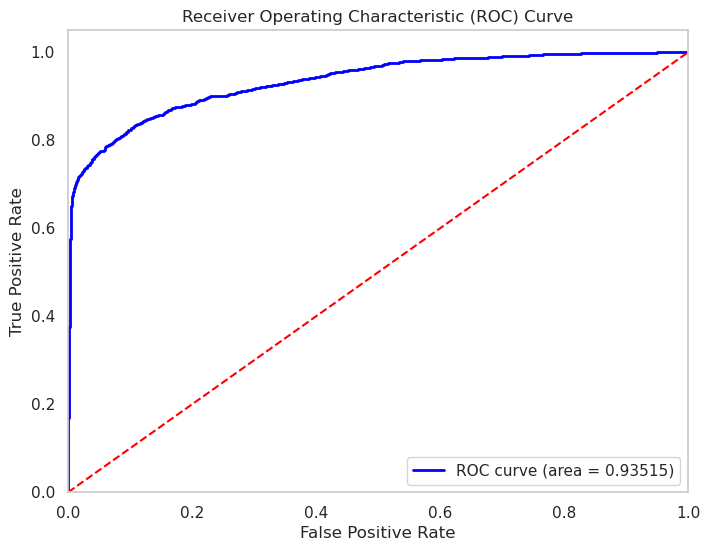

In [20]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

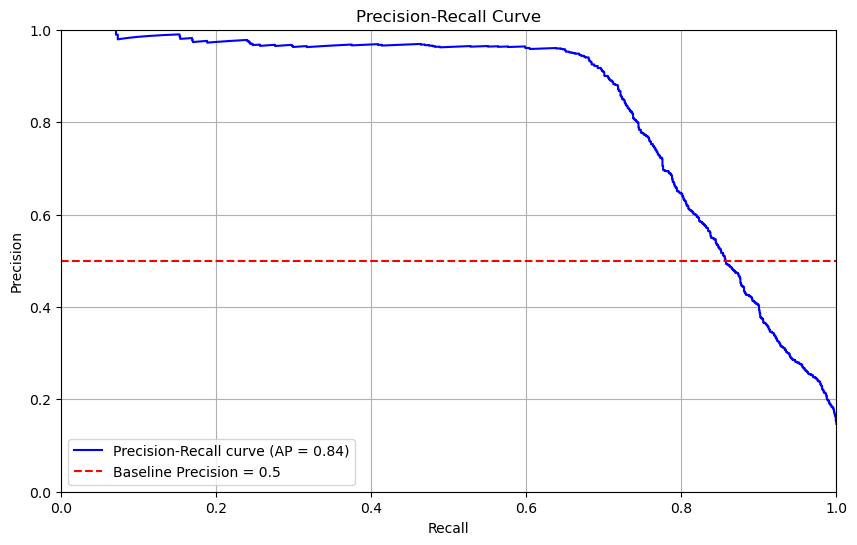

In [12]:
precision, recall, thresholds = precision_recall_curve(labels, predictions)

# Calculate average precision score
average_precision = average_precision_score(labels, predictions)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline Precision = 0.5')
plt.legend(loc='best')
plt.grid()
plt.show()

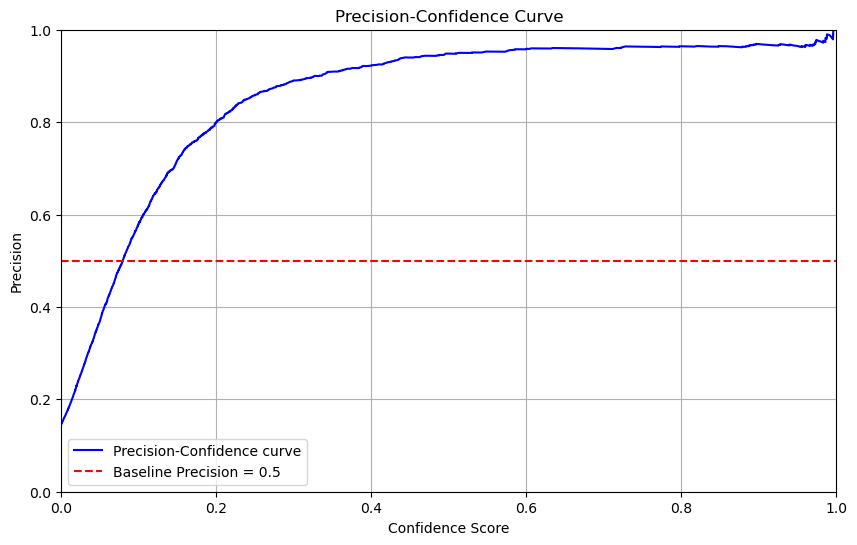

In [13]:
# Plot the Precision-Confidence curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], color='blue', label='Precision-Confidence curve')
plt.xlabel('Confidence Score')
plt.ylabel('Precision')
plt.title('Precision-Confidence Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline Precision = 0.5')
plt.legend(loc='best')
plt.grid()
plt.show()

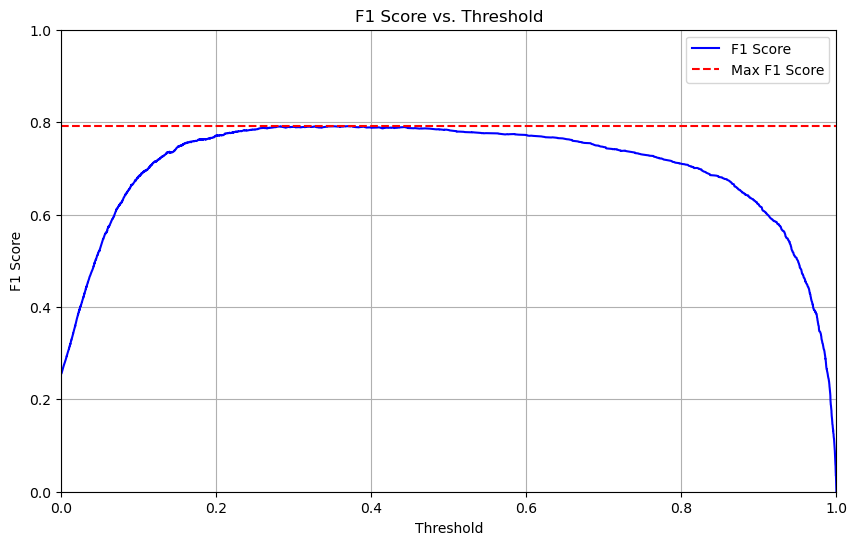

In [14]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Add a small constant to avoid division by zero

# Plot the F1-confidence curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], color='blue', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axhline(y=max(f1_scores), color='r', linestyle='--', label='Max F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [15]:
params_file_path = f"models/best_params.json"

# Load the best parameters
with open(params_file_path, 'r') as json_file:
    best_params = json.load(json_file)
print("Loaded best parameters:", best_params)

# Load the best model weights
best_model_weights = torch.load(f"models/best_model.pth")

# Train on all data with best hyperparameters
data = pd.read_csv('./data/train.csv')
X = data.drop('loan_status', axis=1)
y = data['loan_status']

preprocessor = LoanPreprocessor()
X_processed = preprocessor.fit_transform(X)

final_dataset = LoanDataset(X_processed, y.values)

# Create final model with best hyperparameters
final_model = LoanNeuralNetwork(
    input_size=input_size, 
    hidden_size1=best_params['hidden_size1'], 
    hidden_size2=best_params['hidden_size2'], 
    dropout_rate=best_params['dropout_rate']
).to(device)

final_loader = DataLoader(final_dataset, batch_size=best_params['batch_size'], shuffle=True)
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Train the final model
final_model.train()
early_stopping = EarlyStopping(patience=patience, verbose=True)
best_loss = float('inf')
best_model_weights = None  # To store the best model weights

for epoch in range(epochs):
    total_loss = 0
    for features, labels in final_loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = final_model(features)
        loss = criterion(outputs.view(-1), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(final_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {avg_loss:.4f}')

    # Check early stopping
    early_stopping(avg_loss)
    if early_stopping.early_stop:
        print("Training stopped early.")
        break

    # Save the best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model_weights = final_model.state_dict()  # Save the model weights
        print("Best model weights saved.")

# Save the best model weights to a file
final_model_save_path = f"models/final_model.pth"
torch.save(best_model_weights, final_model_save_path)
print(f"Best model weights saved to {final_model_save_path}")

Loaded best parameters: {'hidden_size1': 50, 'hidden_size2': 48, 'dropout_rate': 0.11866136533720831, 'learning_rate': 0.0013796983303193278, 'batch_size': 187}
Epoch [1/100], Training Loss: 0.2786
Best model weights saved.
Epoch [2/100], Training Loss: 0.2029
Best model weights saved.
Epoch [3/100], Training Loss: 0.1951
Best model weights saved.
Epoch [4/100], Training Loss: 0.1923
Best model weights saved.
Epoch [5/100], Training Loss: 0.1895
Best model weights saved.
Epoch [6/100], Training Loss: 0.1871
Best model weights saved.
Epoch [7/100], Training Loss: 0.1846
Best model weights saved.
Epoch [8/100], Training Loss: 0.1850
Epoch [9/100], Training Loss: 0.1823
Best model weights saved.
Epoch [10/100], Training Loss: 0.1823
Best model weights saved.
Epoch [11/100], Training Loss: 0.1804
Best model weights saved.
Epoch [12/100], Training Loss: 0.1804
Epoch [13/100], Training Loss: 0.1785
Best model weights saved.
Epoch [14/100], Training Loss: 0.1776
Best model weights saved.
Epoc

In [16]:
# Load the test data for submission
raw_submission_data = pd.read_csv('./data/test.csv')
submission_data = preprocessor.transform(raw_submission_data)

submission_dataset = LoanDataset(submission_data, np.zeros(len(submission_data)))  # Placeholder for labels

submission_loader = DataLoader(submission_dataset, batch_size=1, shuffle=False)


In [17]:
# Load the final model from best weights
final_model_save_path = f"models/final_model.pth"
final_model_weights = torch.load(final_model_save_path)

preprocessor = LoanPreprocessor()


# Load the best parameters
params_file_path = f"models/best_params.json"
with open(params_file_path, 'r') as json_file:
    best_params = json.load(json_file)
print("Loaded best parameters:", best_params)

# Load the best model
final_model = LoanNeuralNetwork(
    input_size=input_size, 
    hidden_size1=best_params['hidden_size1'], 
    hidden_size2=best_params['hidden_size2'], 
    dropout_rate=best_params['dropout_rate']
).to(device)

# Load the best model weights
final_model.load_state_dict(final_model_weights)

criterion = nn.BCELoss()

Loaded best parameters: {'hidden_size1': 50, 'hidden_size2': 48, 'dropout_rate': 0.11866136533720831, 'learning_rate': 0.0013796983303193278, 'batch_size': 187}


In [18]:
# Make predictions with final model
predictions = []
final_model.eval()
with torch.no_grad():
    for features, _ in submission_loader:  # Ignore labels in test data
        features = features.to(device)
        outputs = final_model(features)
        # No thresholding, just take the raw probabilities
        predictions.extend(outputs.view(-1).cpu().numpy())  # Ensure outputs are flattened

# Create DataFrame to store predictions
predictions_df = pd.DataFrame({
    'id': raw_submission_data['id'],
    'loan_status': predictions  # Save probabilities instead of hard labels
})

# Save predictions to a CSV file
predictions_df.to_csv('data/submission.csv', index=False)

print("Test predictions saved to test_predictions.csv")

Test predictions saved to test_predictions.csv
